In [21]:
import time
import numpy as np
import scipy
import specutils
from specutils import Spectrum1D
from regions import CircleSkyRegion
from photutils import CircularAperture, SkyCircularAperture, aperture_photometry 
from astropy.io import fits
from astropy import wcs
import astropy.units as u
from astropy.stats import sigma_clip
from astropy.utils.data import download_file
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from spectral_cube import SpectralCube
from astropy.convolution import Gaussian2DKernel
import aplpy  

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] =30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

RA_alma=247.0901612 
Dec_alma=-24.6065442

<ipython-input-21-cddc25d7bf84>:7: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, SkyCircularAperture, aperture_photometry
<ipython-input-21-cddc25d7bf84>:7: DeprecationWarning: `photutils.SkyCircularAperture` is a deprecated alias for `photutils.aperture.SkyCircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import SkyCircularAperture` to silence this warning.
  from photutils import CircularAperture, SkyCircularAperture, aperture_photometry
<ipython-input-21-cddc25d7bf84>:7: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to sile

/home/mnarang/anaconda3/lib/python3.8/site-packages/aplpy/core.py:787: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cm.set_bad(color)


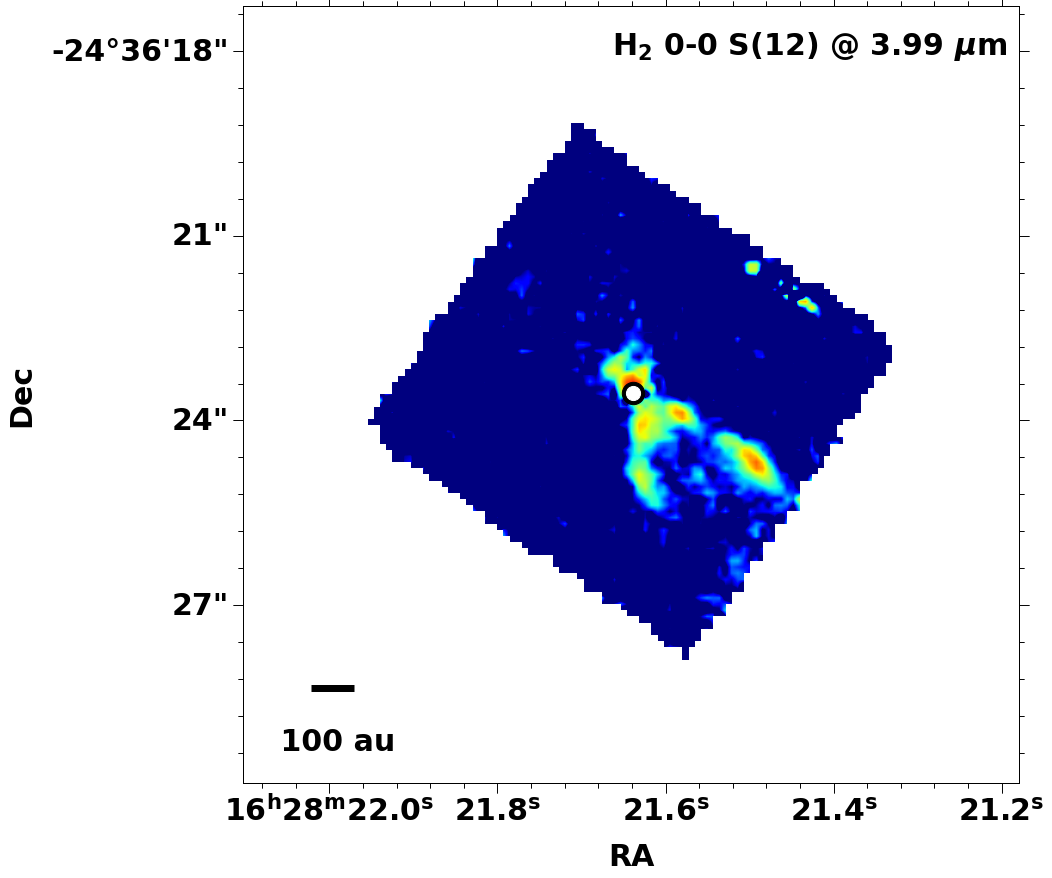

In [22]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_crop1_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

res=1000

H1=3.99614659576064

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S12.fits',overwrite=True)

name='H$_2$ 0-0 S(12)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.08,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.set_nan_color('w')
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+'3.99 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()

fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


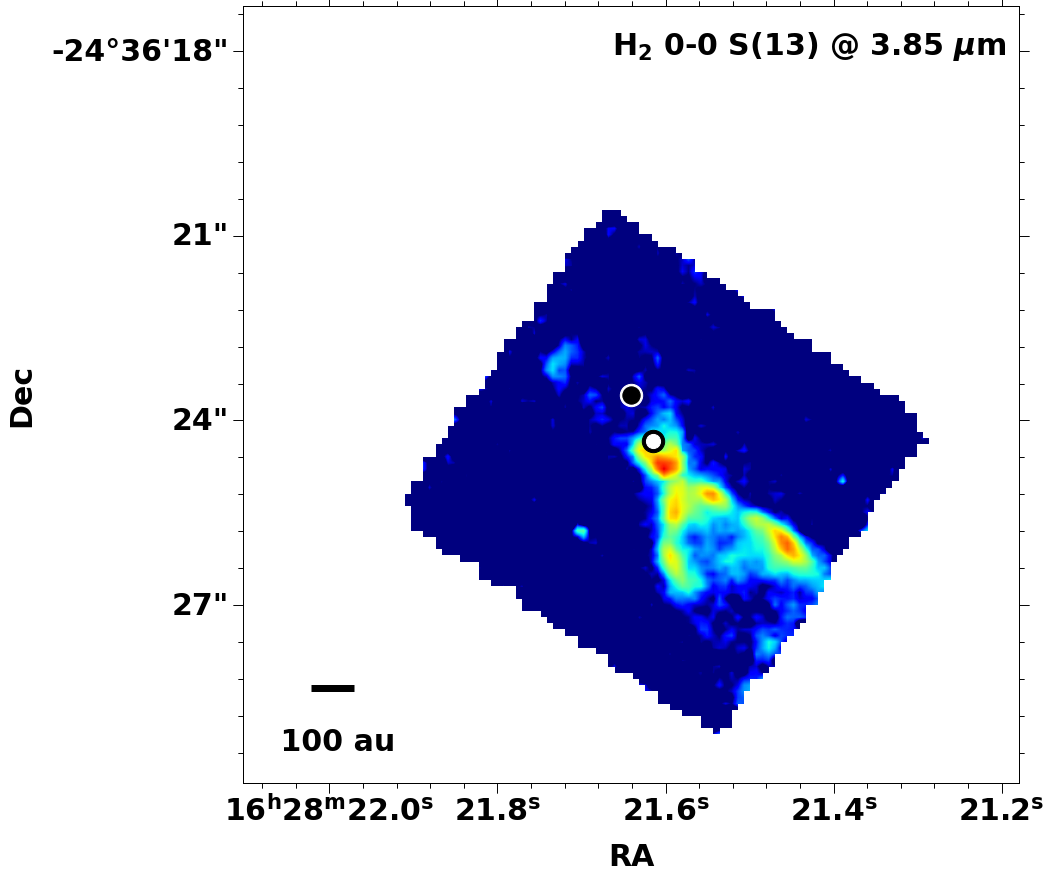

In [3]:
H1=3.84611316611074


w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S13.fits',overwrite=True)

name='H$_2$ 0-0 S(13)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.2,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
##fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


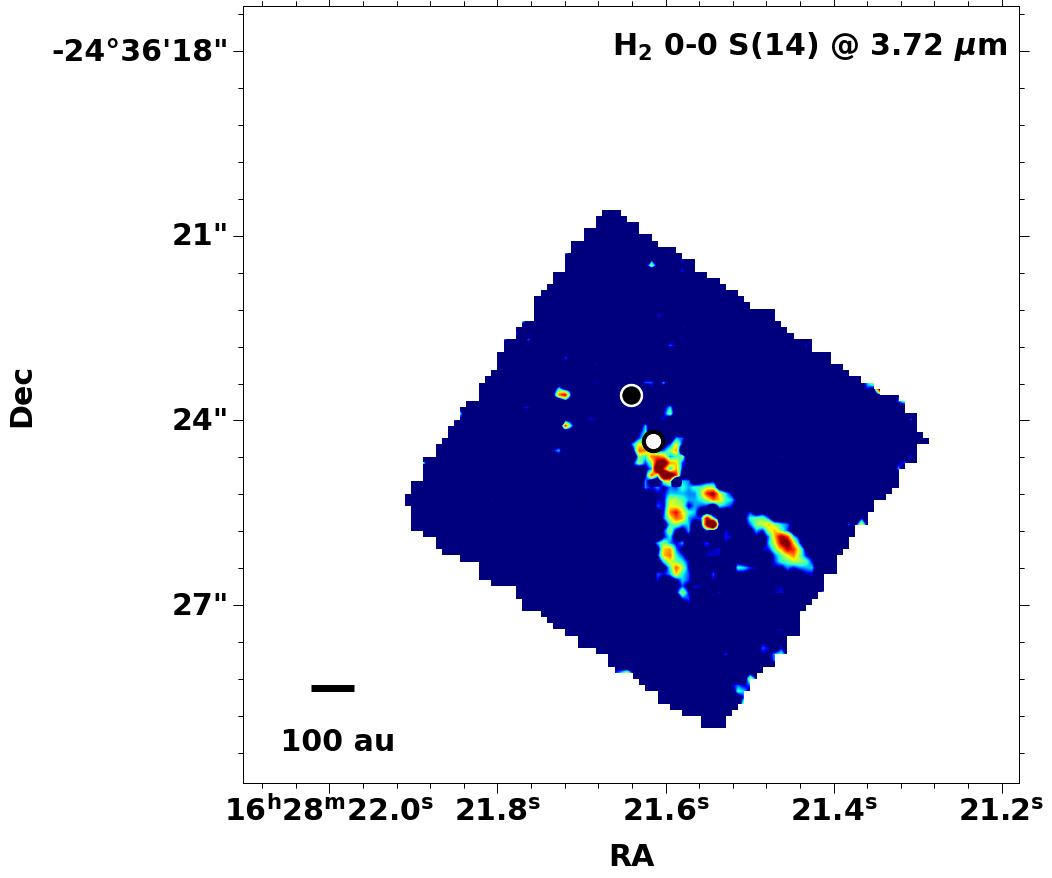

In [4]:
H1=3.72442585740752


w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S14.fits',overwrite=True)

name='H$_2$ 0-0 S(14)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.02,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


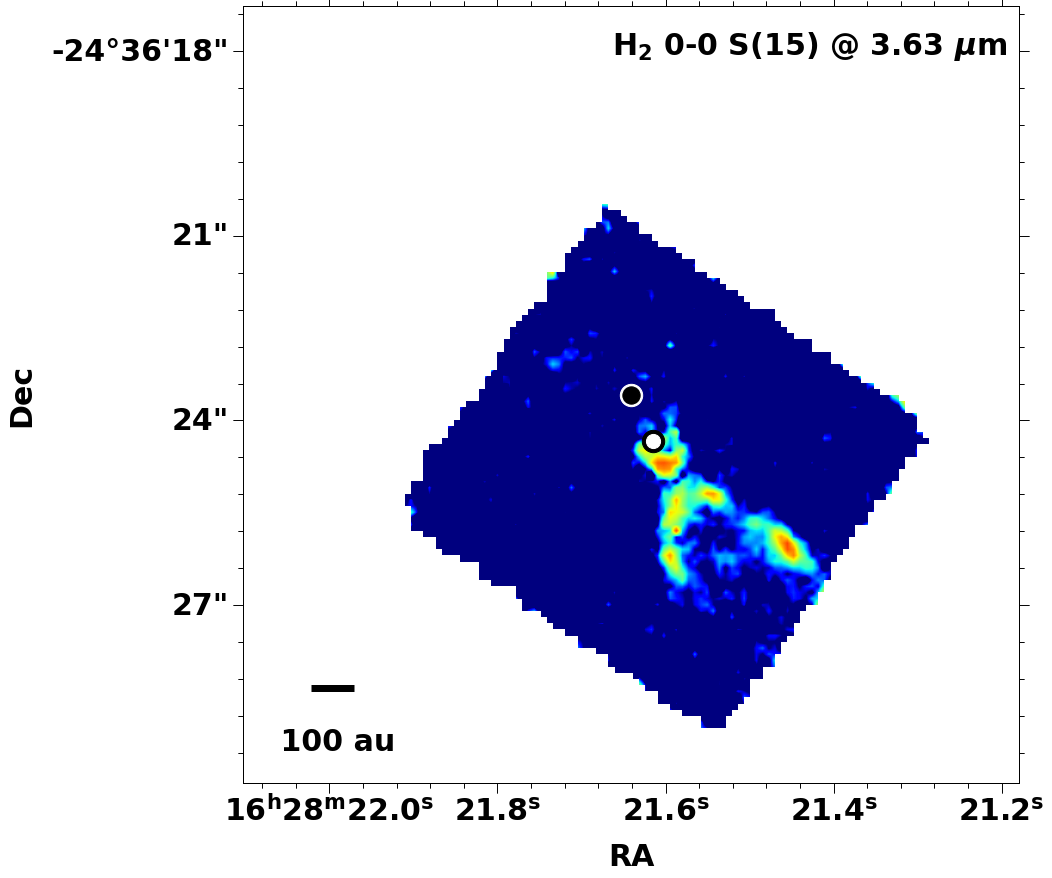

In [5]:
H1=3.62616632920354



w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S15.fits',overwrite=True)

name='H$_2$ 0-0 S(15)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.004,vmax=0.05,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


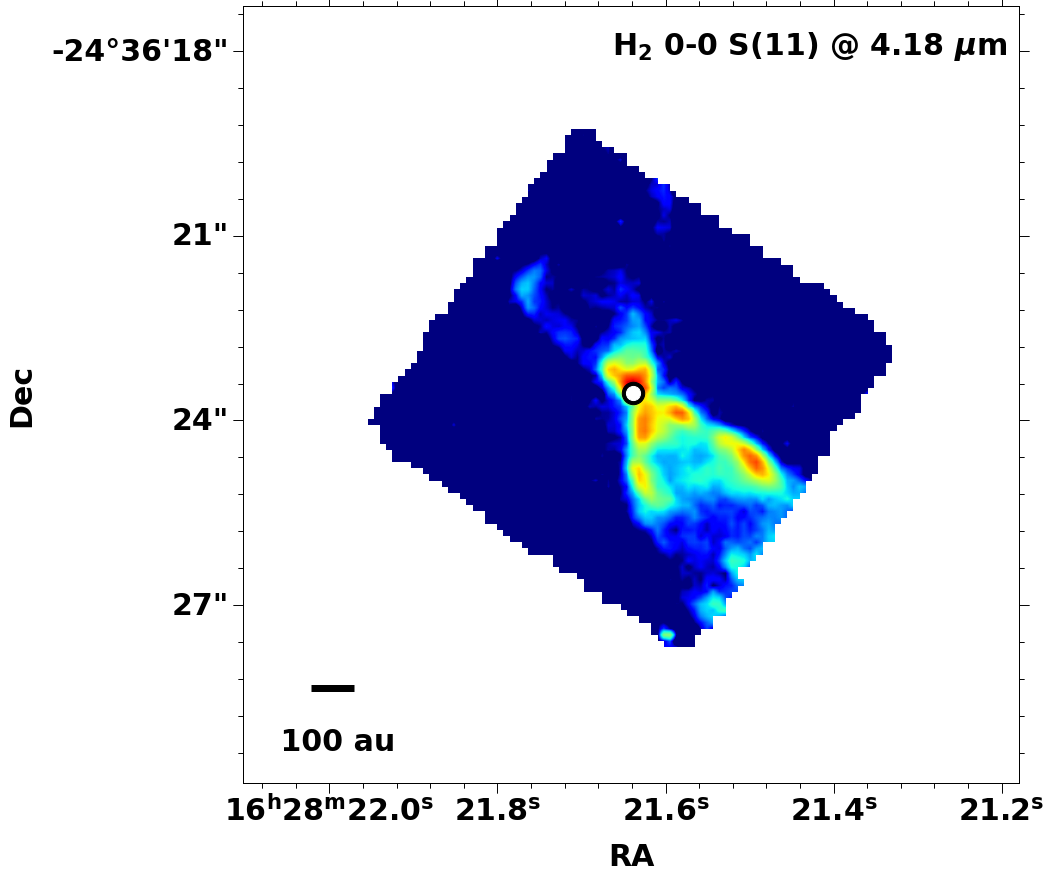

In [23]:
H1=4.18107727211969
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S11.fits',overwrite=True)

name='H$_2$ 0-0 S(11)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.01,vmax=0.4,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


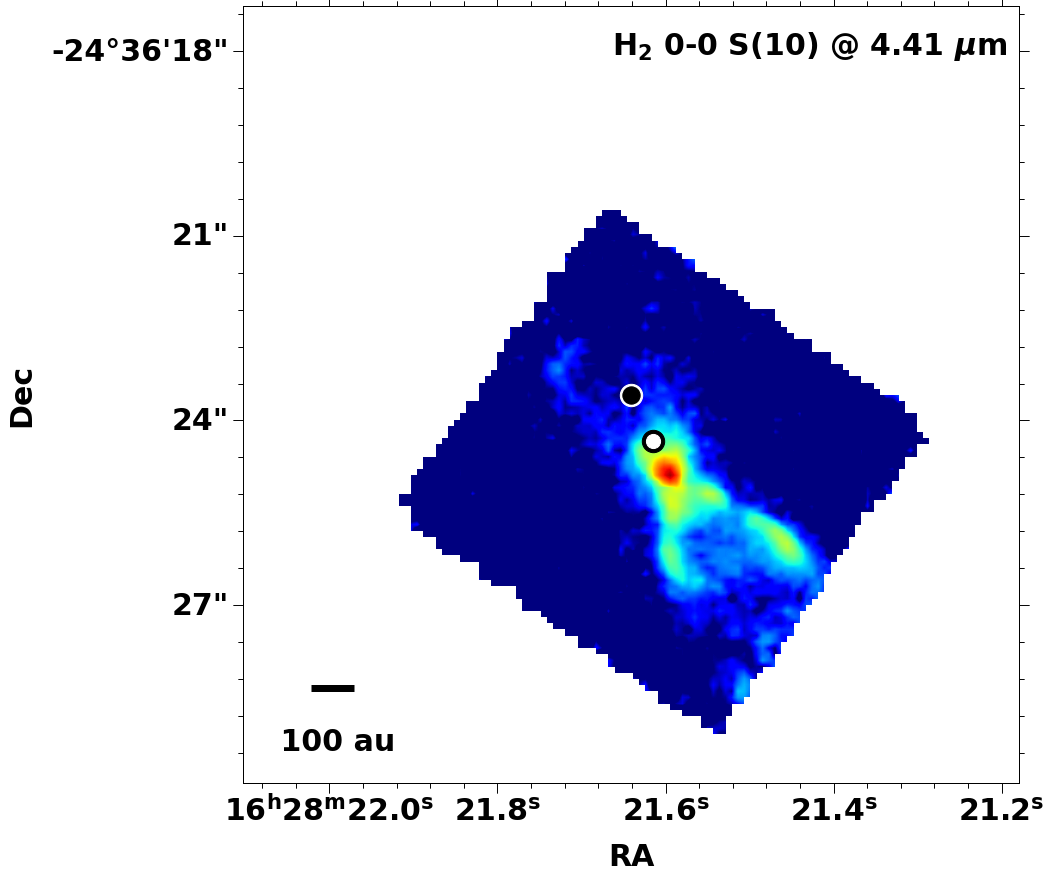

In [7]:
H1=4.40979112980216
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S10.fits',overwrite=True)

name='H$_2$ 0-0 S(10)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.008,vmax=1,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


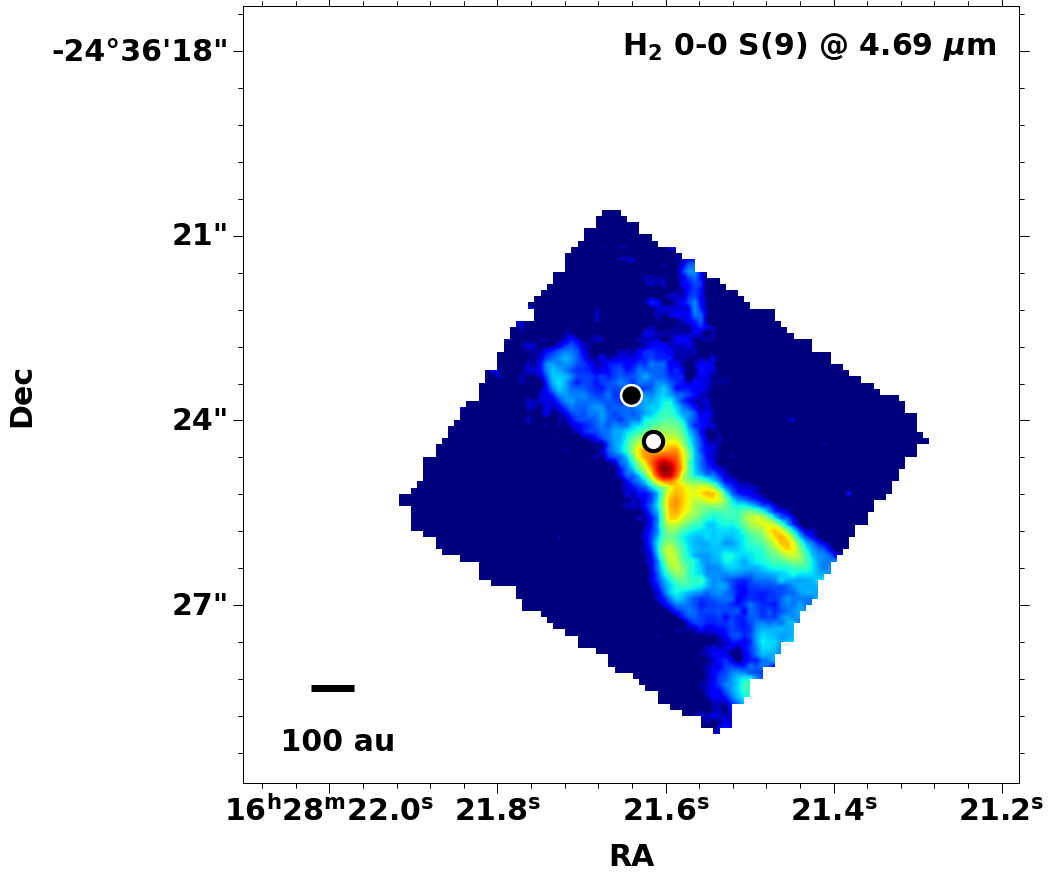

In [8]:
H1=4.69461395391373
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S9.fits',overwrite=True)

name='H$_2$ 0-0 S(9)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.02,vmax=1,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


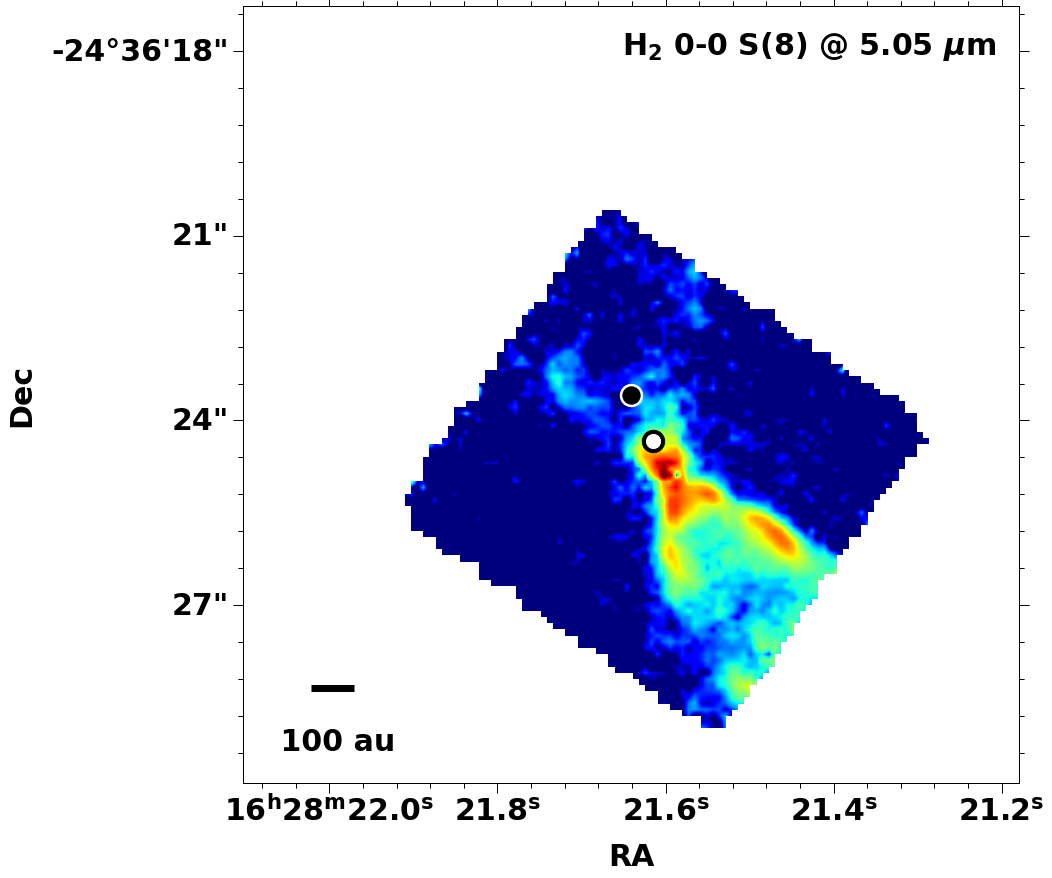

In [9]:
H1=5.0531150609964
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S8.fits',overwrite=True)

name='H$_2$ 0-0 S(8)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.01,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


/home/mnarang/anaconda3/lib/python3.8/site-packages/aplpy/core.py:787: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cm.set_bad(color)


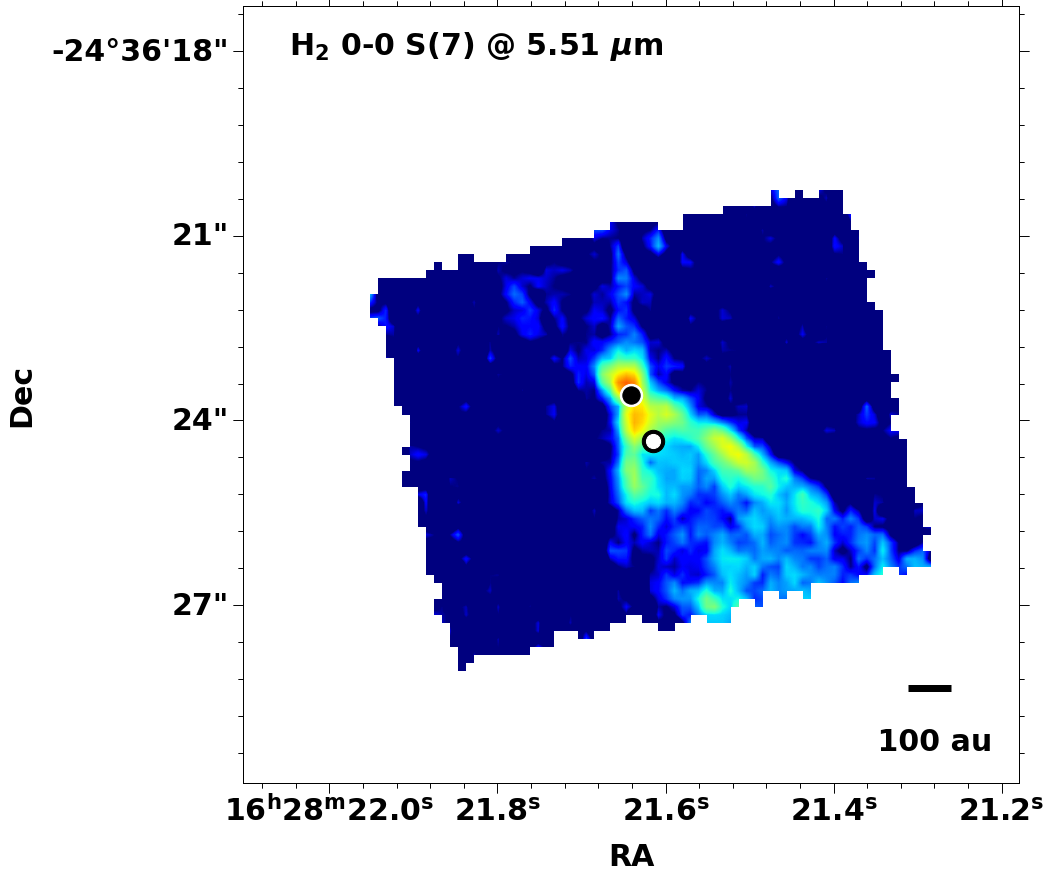

In [10]:
filename = "Level3_ch1-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=5.51118318269065
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 


moment_0.write('H2_S7.fits',overwrite=True)

name='H$_2$ 0-0 S(7)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.08,vmax=3,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
fig.set_nan_color('w')
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



In [11]:
print(cube)

SpectralCube with shape=(1050, 65, 75) and unit=MJy / sr:
 n_x:     75  type_x: RA---TAN  unit_x: deg    range:  -112.911394 deg: -112.908455 deg
 n_y:     65  type_y: DEC--TAN  unit_y: deg    range:   -24.607834 deg:  -24.605523 deg
 n_s:   1050  type_s: WAVE      unit_s: um     range:        4.900 um:       5.740 um


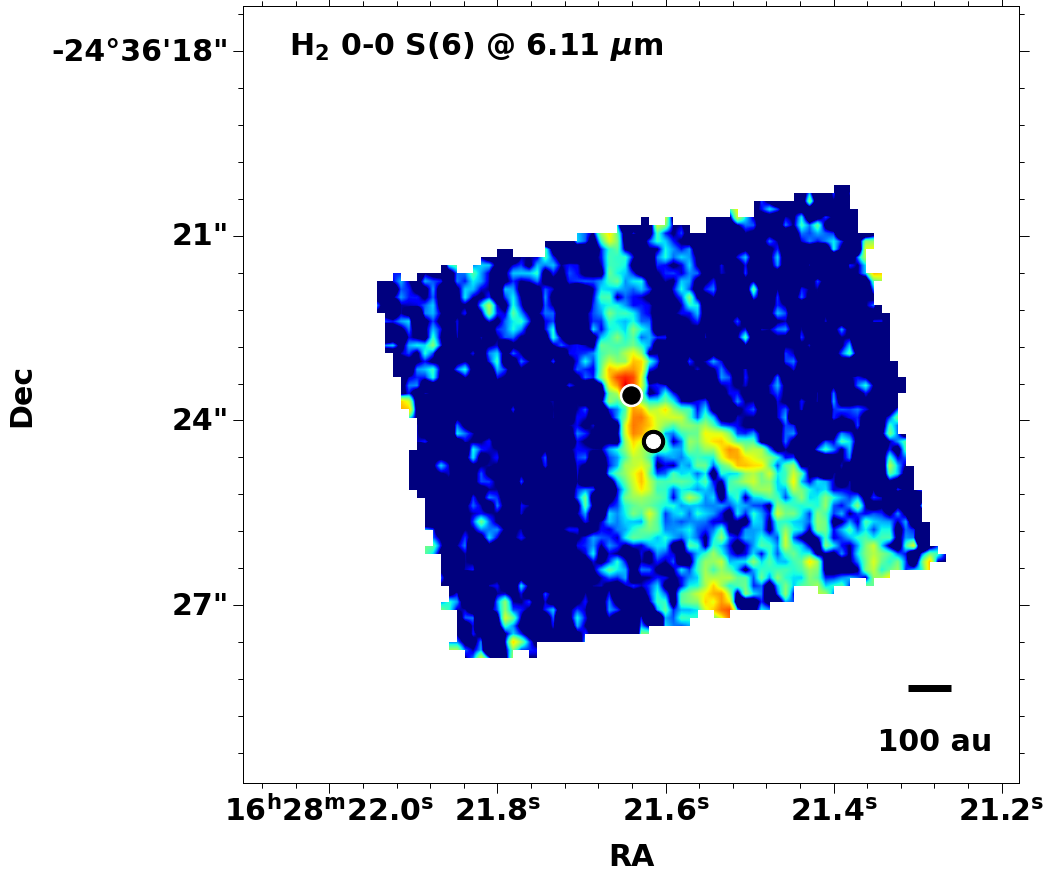

In [12]:
filename = "Level3_ch1-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  
    
H1=6.10856383998984
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S6.fits',overwrite=True)

name='H$_2$ 0-0 S(6)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.03,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



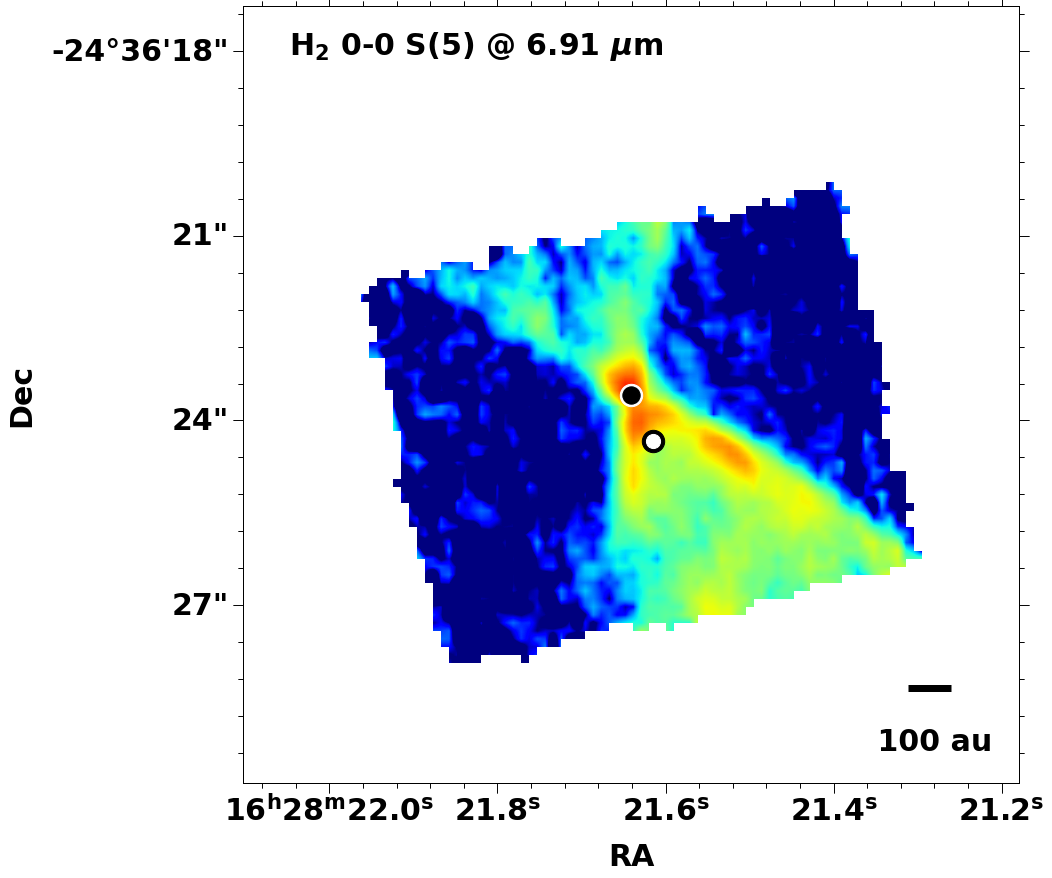

In [13]:
filename = "Level3_ch1-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)      

H1=6.90950872080188
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S5.fits',overwrite=True)

name='H$_2$ 0-0 S(5)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.03,vmax=3,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



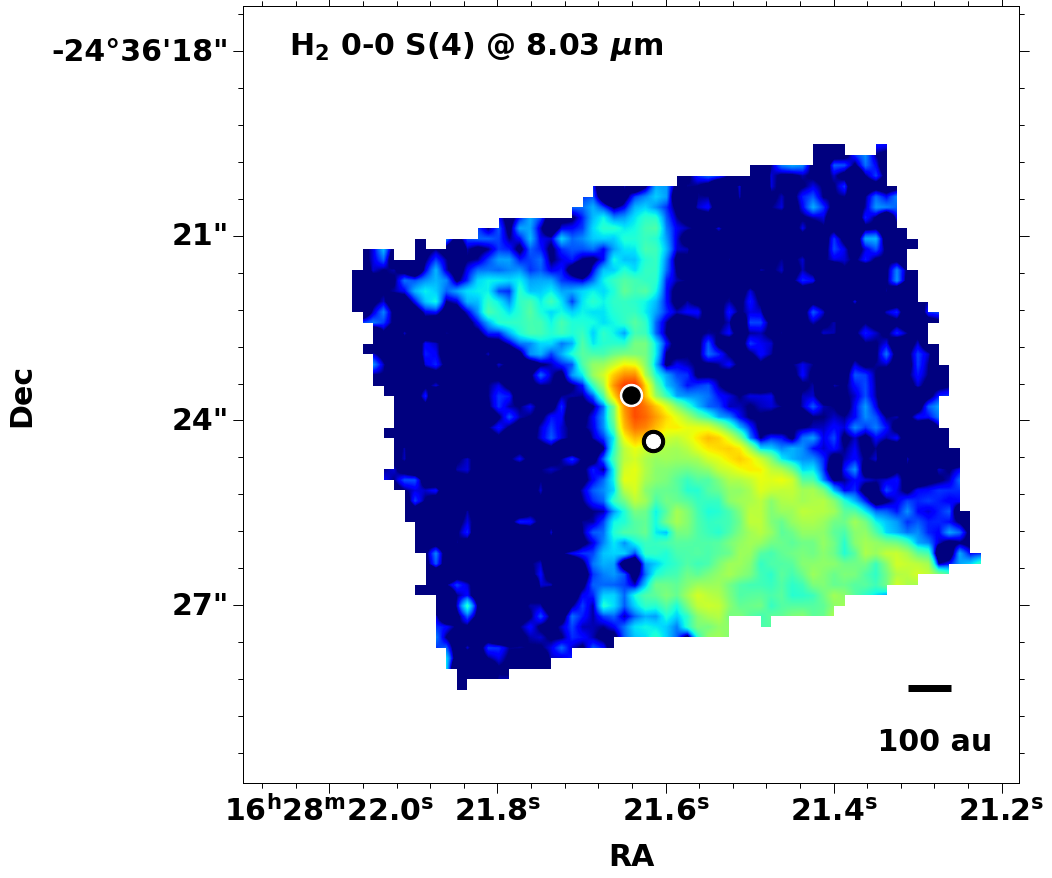

In [14]:
filename = "Level3_ch2-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)      

H1=8.0250413389942
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S4.fits',overwrite=True)

name='H$_2$ 0-0 S(4)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.03,vmax=1.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



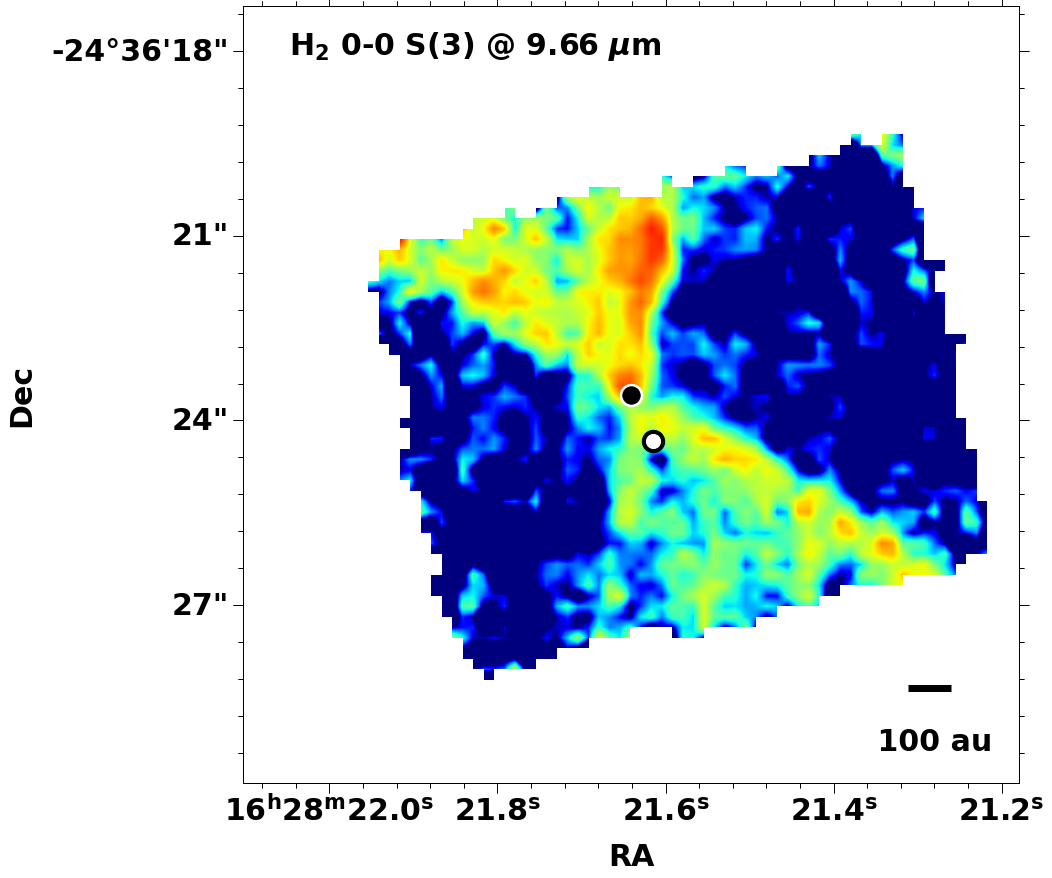

In [15]:
filename = "Level3_ch2-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
  
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)      

H1=9.66491077789291
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S3.fits',overwrite=True)

name='H$_2$ 0-0 S(3)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.03,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



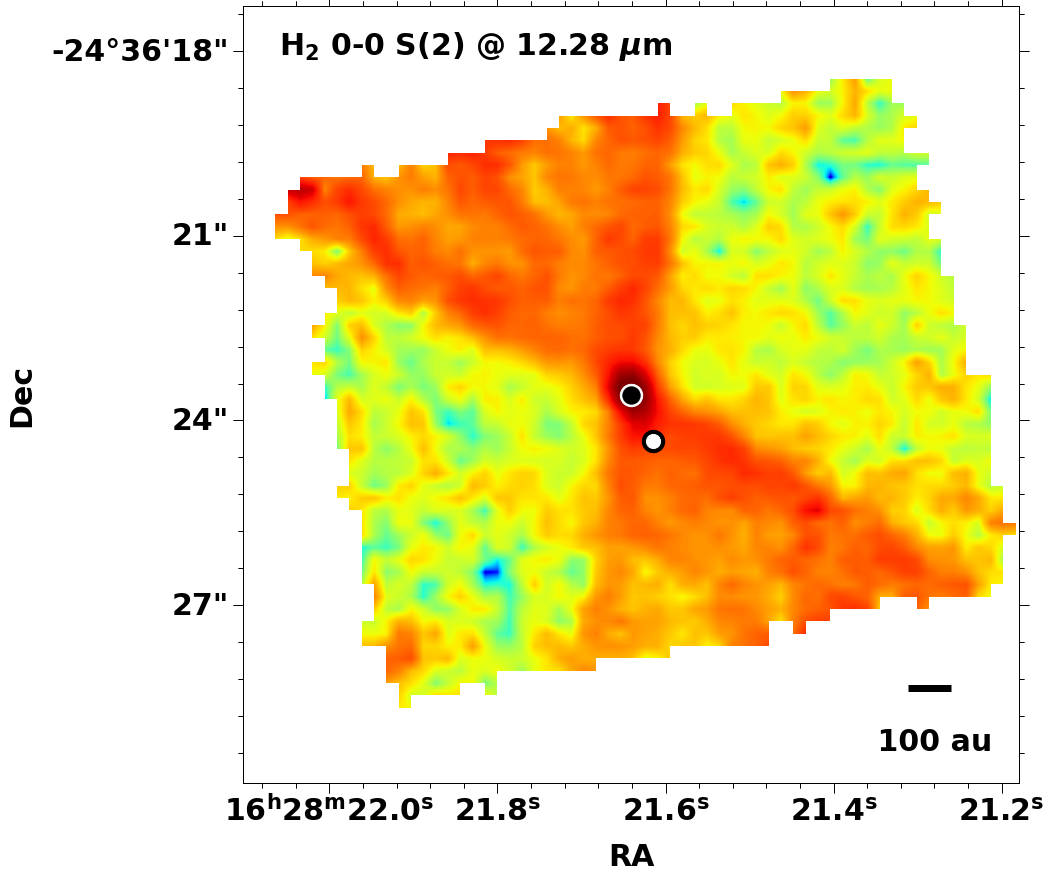

In [16]:
filename = "Level3_ch3-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)      

H1=12.2786120207857
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S2.fits',overwrite=True)

name='H$_2$ 0-0 S(2)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



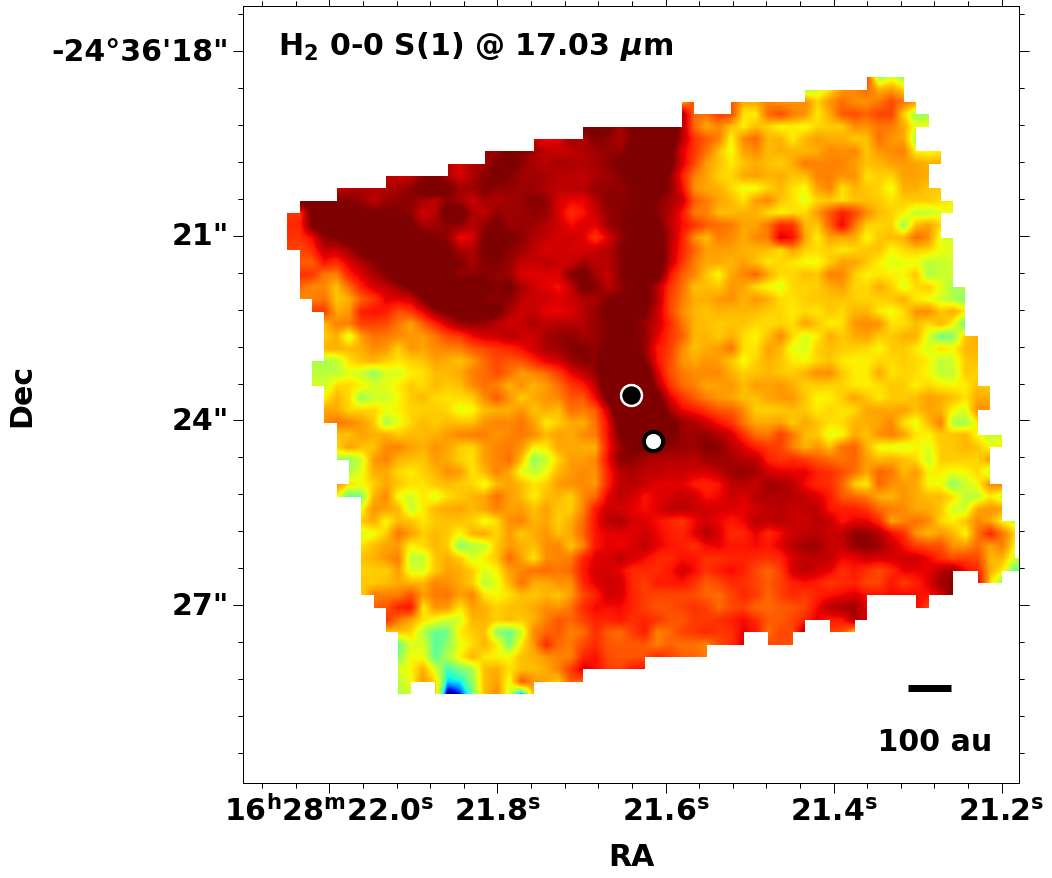

In [17]:
filename = "Level3_ch3-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
   
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)      

H1=17.0348464819635
w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S1.fits',overwrite=True)

name='H$_2$ 0-0 S(1)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.03,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')



In [18]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

res=1000

H1=3.23498765965432

new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_O5.fits',overwrite=True)

name='H$_2$ 1-0 O(5)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.001,vmax=0.02,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


FileNotFoundError: [Errno 2] No such file or directory: 'jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

In [ ]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

res=1000

H1=3.50080924706555

new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_O6.fits',overwrite=True)

name='H$_2$ 1-0 O(6)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.001,vmax=0.05,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


In [ ]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

res=1000

H1=3.80741892329848

new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_O7.fits',overwrite=True)

name='H$_2$ 1-0 O(7)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.1,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


In [ ]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

res=1000

H1=4.16242498217546

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_O8.fits',overwrite=True)

name='H$_2$ 1-0 O(8)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.001,vmax=0.03,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')


In [ ]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_newmask3_s3d.fits'

with fits.open(file, memmap=False) as hdulist1:
    sci = hdulist1['SCI'].data
    err = hdulist1['ERR'].data
    w = wcs.WCS(hdulist1[1].header)
    hdr = hdulist1[1].header
    cdel=hdr["CDELT1"]

cube = SpectralCube.read(hdulist1[1])

new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

res=1000

H1=4.95409511

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('H2_S9_11.fits',overwrite=True)

name='H$_2$ 1-1 S(9)'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.005,vmax=0.3,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig(str(name)+'.png')
